## Observations and Insights 

We were having 249 mice at the beginning of our analysis. After cleanup of data, we are left with 248 mice. 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(left= mouse_metadata, right = study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice
total_mice = len(combined_df["Mouse ID"].value_counts())
total_mice

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

has_duplicate = combined_df.duplicated(["Mouse ID", "Timepoint"])

duplicate_mouseid = combined_df.loc[has_duplicate]
duplicate_mice = duplicate_mouseid["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouseid = duplicate_mouseid
all_duplicate_mouseid


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.loc[combined_df['Mouse ID'] != duplicate_mice[0], :]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_df["Mouse ID"].value_counts())
new_mice_count

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

groupby_drug = clean_df.groupby(["Drug Regimen"])

mean_summary = groupby_drug["Tumor Volume (mm3)"].mean()
median_summary = groupby_drug["Tumor Volume (mm3)"].median()
var_summary = groupby_drug["Tumor Volume (mm3)"].var()
std_summary = groupby_drug["Tumor Volume (mm3)"].std()
sem_summary = groupby_drug["Tumor Volume (mm3)"].sem()

# Create the dataframe
summary_df = pd.DataFrame({ "mean" : mean_summary,
                           "median" : median_summary,
                           "var" : var_summary,
                          "std": std_summary,
                          "sem" : sem_summary
                          })
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

single_groupby = clean_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
single_groupby


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Group the DataFrame on Drug Regimen and do count on Mouse ID
grouped_mice_treatment = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

pandas_mice_treatment = grouped_mice_treatment.reset_index()

# Rename the Mouse ID header
pandas_mice_treatment = pandas_mice_treatment.rename(columns = {"Mouse ID" : "Total number of Mice"})

# Set the index to "Drug Regimen"
pandas_mice_treatment = pandas_mice_treatment.set_index("Drug Regimen")
pandas_mice_treatment


,Total number of Mice
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


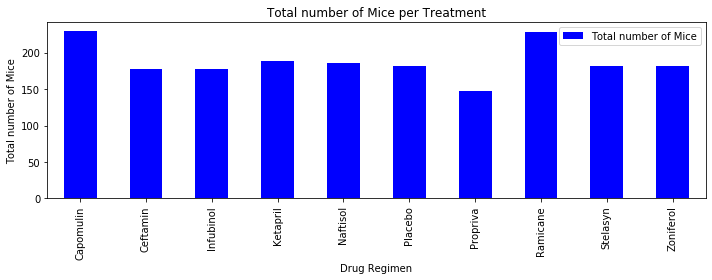

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
pandas_mice_treatment.plot(kind = "bar", color = "blue",legend = "Total number of Mice",  figsize = (10, 4), width = 0.5)

# Set aesthetics
plt.title("Total number of Mice per Treatment")
plt.ylabel("Total number of Mice")
plt.tight_layout()
plt.show()

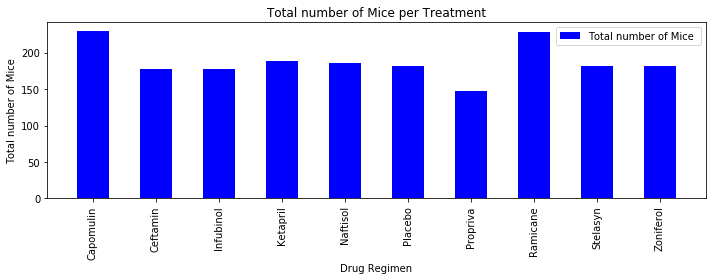

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot

pandas_mice_treatment = pandas_mice_treatment.reset_index()

x_axis = np.arange(0, len(pandas_mice_treatment["Drug Regimen"]))

tick_name = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril','Naftisol', 'Placebo', 
             'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol' ]

plt.figure(figsize=(10,4))

plt.bar(x_axis, pandas_mice_treatment["Total number of Mice"], color = "blue", align = "center", width = 0.5)
plt.xticks(x_axis, tick_name, rotation = "vertical")

# Set aesthetics
plt.legend(["Total number of Mice "], loc = "upper right")
plt.title("Total number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.tight_layout()
plt.show()


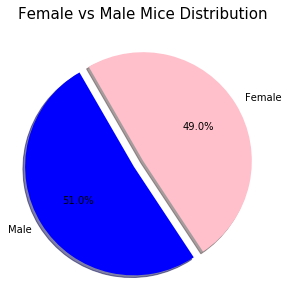

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
color = ["blue", "pink"]
explode = [0.10, 0]
mice_gender = clean_df["Sex"].value_counts()
mice_gender.plot(kind = "pie", autopct="%1.1f%%", colors = color, explode = explode, shadow = True, startangle = 120, figsize = (5, 5))

# Set aesthetics
plt.title("Female vs Male Mice Distribution", fontsize = 15)
plt.ylabel(None)
plt.show()


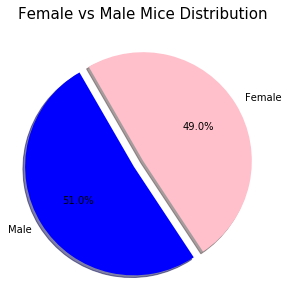

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

color = ["blue", "pink"]
explode = [0.10, 0]
labels = ["Male", "Female"]
sizes = clean_df["Sex"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sizes, colors = color, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 120)
plt.title("Female vs Male Mice Distribution", fontsize = 15)
plt.show()


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    df = clean_df.loc[clean_df["Drug Regimen"] == treatment, :]
    max_timepoint = df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

    merged_df = pd.merge(left = combined_df, right = max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_vol = merged_df["Tumor Volume (mm3)"]

    # Calculation of quartiles, lower and upper quartiles & IQR
    quartiles = drug_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Print the above results for all treatments
    print(f"{treatment}")
    print("----------------")
    print(f"The lower quartile of {treatment} regimen is: {round(lowerq, 2)}")
    print(f"The upper quartile of {treatment} regimen is: {round(upperq, 2)}")
    print(f"The interquartile range of {treatment} regimen is: {round(iqr, 2)}")
    print(f"The the median of {treatment} regimen is: {round(quartiles[0.5], 2)} ")

    # Calculation of lower and upper bounds to get outliers, if any
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    # print the above results
    print(f"For {treatment} : Values below {round(lower_bound, 2)} could be outliers.")
    print(f"for {treatment} : Values above {round(upper_bound, 2)} could be outliers.\n")
   
    # add subset 
    tumor_vol_list.append(drug_vol)
    

Capomulin
----------------
The lower quartile of Capomulin regimen is: 32.38
The upper quartile of Capomulin regimen is: 40.16
The interquartile range of Capomulin regimen is: 7.78
The the median of Capomulin regimen is: 38.13 
For Capomulin : Values below 20.7 could be outliers.
for Capomulin : Values above 51.83 could be outliers.

Ramicane
----------------
The lower quartile of Ramicane regimen is: 31.56
The upper quartile of Ramicane regimen is: 40.66
The interquartile range of Ramicane regimen is: 9.1
The the median of Ramicane regimen is: 36.56 
For Ramicane : Values below 17.91 could be outliers.
for Ramicane : Values above 54.31 could be outliers.

Infubinol
----------------
The lower quartile of Infubinol regimen is: 54.05
The upper quartile of Infubinol regimen is: 65.53
The interquartile range of Infubinol regimen is: 11.48
The the median of Infubinol regimen is: 60.17 
For Infubinol : Values below 36.83 could be outliers.
for Infubinol : Values above 82.74 could be outliers

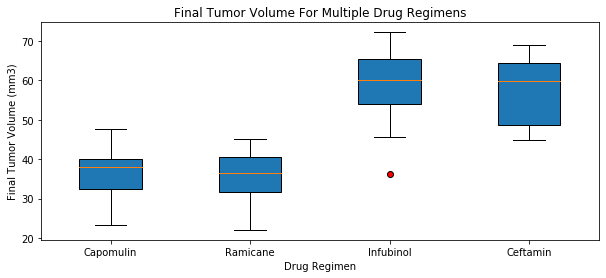

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# ticks = []
plt.figure(figsize = (10, 4))
red_circle = dict(markerfacecolor='r', marker='o')
plt.boxplot(tumor_vol_list, labels = treatments, manage_ticks = True, patch_artist = True, flierprops = red_circle)
plt.title("Final Tumor Volume For Multiple Drug Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# plt.label(treatment)
# plt.xticks(treatments)
plt.show()


## Line and Scatter Plots

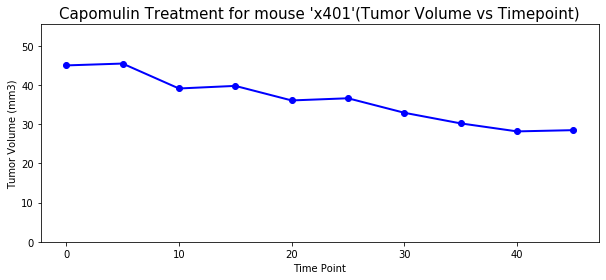

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]

capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401", :]

plot_capomulin_mouse = capomulin_mouse[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")

capomulin_mouse_df = plot_capomulin_mouse.reset_index()

plot_capomulin_mouse.plot(kind = "line", marker = "o", color = "blue", linewidth=2, legend = None, figsize = (10, 4))
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse 'x401'(Tumor Volume vs Timepoint)", fontsize = 15)
plt.ylim(0, max(capomulin_mouse_df["Tumor Volume (mm3)"]) + 10)
plt.show()


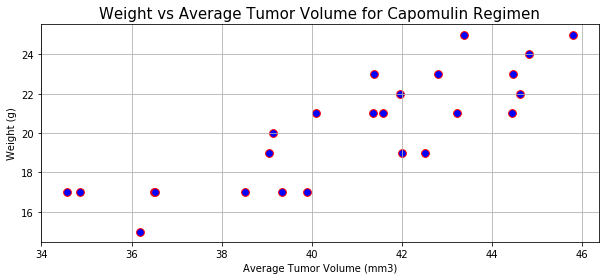

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


avg_tumor_vol = capomulin_df.groupby(capomulin_df["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
avg_tumor_vol = avg_tumor_vol.reset_index()

x_axis = avg_tumor_vol["Tumor Volume (mm3)"]
y_axis = avg_tumor_vol["Weight (g)"]

plt.figure(figsize = (10, 4))

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="red", s = 60)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Weight vs Average Tumor Volume for Capomulin Regimen", fontsize = 15)

plt.grid()
plt.plot()
plt.show()

## Correlation and Regression

The correlation coefficient between Mouse Weight and average Tumor Volume for the Capomulin regimen is 0.84


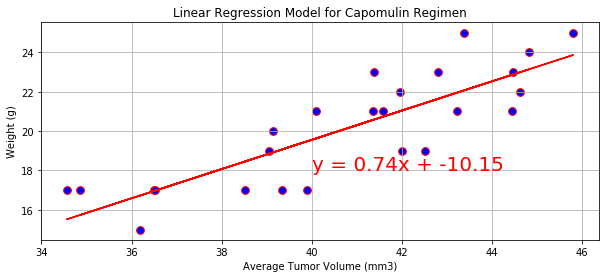

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_value = avg_tumor_vol["Tumor Volume (mm3)"]
y_value = avg_tumor_vol["Weight (g)"]

correlation = st.pearsonr(x_value, y_value)

print(f"The correlation coefficient between Mouse Weight and average Tumor Volume for the Capomulin regimen is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,4))
plt.scatter(x_value,y_value, marker="o", facecolors="blue", edgecolors="red", s = 60)
plt.plot(x_value,regress_values,"r-")

plt.annotate(line_eq,(40, 18),fontsize = 20, color="red")
plt.title("Linear Regression Model for Capomulin Regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.grid()
plt.show()


In [ ]:
#  mouse_study_data_df.loc[mouse_study_data_df["Mouse ID"] == "g989"]

In [ ]:
# # Capomulin
# capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
# capomulin_max_timepoint = capomulin_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# merged_capomulin = pd.merge(left = mouse_study_data_df, right = capomulin_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
# merged_capomulin.head()


# # Capomulin IQR

# capomulin_vol = merged_capomulin["Tumor Volume (mm3)"]

# quartiles = capomulin_vol.quantile([0.25, 0.5, 0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq

# print(f"The lower quartile of Capomulin regimen is: {round(lowerq, 2)}")
# print(f"The upper quartile of Capomulin regimen is: {round(upperq, 2)}")
# print(f"The interquartile range of Capomulin regimen is: {round(iqr, 2)}")
# print(f"The the median of Capomulin regimen is: {round(quartiles[0.5], 2)} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {round(lower_bound, 2)} could be outliers.")
# print(f"Values above {round(upper_bound, 2)} could be outliers.")

# # Ramicane

# ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
# ramicane_max_timepoint = ramicane_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# merged_ramicane = pd.merge(left = mouse_study_data_df, right = ramicane_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
# merged_ramicane.head()

# # Ramicane IQR

# ramicane_vol = merged_ramicane["Tumor Volume (mm3)"]

# quartiles = ramicane_vol.quantile([0.25, 0.5, 0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq

# print(f"The lower quartile of Ramicane regimen is: {round(lowerq, 2)}")
# print(f"The upper quartile of Ramicane regimen is: {round(upperq, 2)}")
# print(f"The interquartile range of Ramicane regimen is: {round(iqr, 2)}")
# print(f"The the median of Ramicane regimen is: {round(quartiles[0.5], 2)} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {round(lower_bound, 2)} could be outliers.")
# print(f"Values above {round(upper_bound, 2)} could be outliers.")

# # Infubinol

# infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
# infubinol_max_timepoint = infubinol_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# merged_infubinol = pd.merge(left = mouse_study_data_df, right = infubinol_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
# merged_infubinol.head()

# # Infubinol IQR 

# infubinol_vol = merged_infubinol["Tumor Volume (mm3)"]

# quartiles = infubinol_vol.quantile([0.25, 0.5, 0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq

# print(f"The lower quartile of Infubinol regimen is: {round(lowerq, 2)}")
# print(f"The upper quartile of Infubinol regimen is: {round(upperq, 2)}")
# print(f"The interquartile range of Infubinol regimen is: {round(iqr, 2)}")
# print(f"The the median of Infubinol regimen is: {round(quartiles[0.5], 2)} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {round(lower_bound, 2)} could be outliers.")
# print(f"Values above {round(upper_bound, 2)} could be outliers.")

# # Ceftamin

# ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
# ceftamin_max_timepoint = ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# merged_ceftamin = pd.merge(left = mouse_study_data_df, right = ceftamin_max_timepoint, on = ["Mouse ID", "Timepoint"], how = "right")
# merged_ceftamin.head()


# ceftamin_vol = merged_ceftamin["Tumor Volume (mm3)"]

# quartiles = ceftamin_vol.quantile([0.25, 0.5, 0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq

# print(f"The lower quartile of Ceftamin regimen is: {round(lowerq, 2)}")
# print(f"The upper quartile of Ceftamin regimen is: {round(upperq, 2)}")
# print(f"The interquartile range of Ceftamin regimen is: {round(iqr, 2)}")
# print(f"The the median of Ceftamin regimen is: {round(quartiles[0.5], 2)} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {round(lower_bound, 2)} could be outliers.")
# print(f"Values above {round(upper_bound, 2)} could be outliers.")

In [ ]:
# df1 = merged_capomulin
# df2 = merged_ramicane
# df3 = merged_infubinol
# df4 = merged_ceftamin

# merge_df1_df2 = pd.concat([df1, df2])
# merge_df3_df4 = pd.concat([df3, df4])

# merged_drug_regimen = pd.concat([merge_df1_df2, merge_df3_df4])
# merged_drug_regimen